# Automated Machine Learning for Loan Default Detection

# Table of Contents <a class="anchor" id="0"></a>
- <b>[1. Data Preparation](#1)</b>
- <b>[2. Feature Engineering](#2)</b>
  - [2.1 Binning the numerical variables](#21)
  - [2.2 WOE Transformation for Categorical Variables](#22)
  - [2.3 FE for Test Set](#23)
- <b>[3. Random Forests model](#3)</b>
- <b>[4. SHAP Value](#4)</b>
- <b>[5. Conclusion](#5)</b>

       
  <p>&nbsp;</p>

In [1]:
import numpy as np
import pandas as pd
np.random.seed(0)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

## 1. Data Preparation <a class="anchor" id="1"></a>

In [2]:
path = '/Users/mac/Downloads/' 
df = pd.read_csv(path + 'XYZloan_default_selected_vars.csv')  
df.tail()

,Unnamed: 0.1,Unnamed: 0,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,...,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
79995,79995,79996,79996,0,39,2,1,12,2017/5/7 13:44,android,...,15.0,8.0,864.0,684.0,1261.0,764.0,2600.0,1074.0,11.0,OPPO
79996,79996,79997,79997,0,31,1,4,12,2017/6/2 15:54,ios,...,25.0,25.0,6177.0,6177.0,6426.0,6426.0,6426.0,6426.0,6.0,IPHONE7
79997,79997,79998,79998,0,37,1,1,12,2017/7/9 8:40,android,...,14.0,13.0,1116.0,1116.0,2061.0,2061.0,2501.0,2061.0,12.0,VIVO
79998,79998,79999,79999,0,38,2,1,12,2017/5/9 10:19,android,...,5.0,2.0,25.0,0.0,498.0,343.0,514.0,343.0,6.0,XIAOMI
79999,79999,80000,80000,1,25,1,3,12,2017/4/27 18:36,h5,...,9.0,9.0,129.0,129.0,167.0,167.0,167.0,167.0,7.0,WEB


In [3]:
print(df.shape)
print(df.columns) # check column names
df.describe() # Get the Simple Summary Statistics 

(80000, 89)
Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'loan_default', 'AP001', 'AP002',
       'AP003', 'AP004', 'AP005', 'AP006', 'AP007', 'AP008', 'AP009', 'TD001',
       'TD002', 'TD005', 'TD006', 'TD009', 'TD010', 'TD013', 'TD014', 'TD015',
       'TD022', 'TD023', 'TD024', 'TD025', 'TD026', 'TD027', 'TD028', 'TD029',
       'TD044', 'TD048', 'TD051', 'TD054', 'TD055', 'TD061', 'TD062', 'CR004',
       'CR005', 'CR009', 'CR012', 'CR015', 'CR017', 'CR018', 'CR019', 'PA022',
       'PA023', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018', 'CD071',
       'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108', 'CD113',
       'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123', 'CD130',
       'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD152', 'CD153',
       'CD160', 'CD162', 'CD164', 'CD166', 'CD167', 'CD169', 'CD170', 'CD172',
       'CD173', 'MB005', 'MB007'],
      dtype='object')


,Unnamed: 0.1,Unnamed: 0,id,loan_default,AP001,AP002,AP003,AP004,AP007,AP008,...,CD160,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.00000,80000.000000,...,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.00000,79619.000000,79619.000000,77207.000000
mean,39999.500000,40000.500000,40000.500000,0.193600,31.706913,1.321813,2.014925,11.235413,3.30130,3.117200,...,6.911956,14.271694,11.773358,909.089313,810.786219,1732.693314,1539.33443,2513.226491,2229.606137,5.976272
std,23094.155105,23094.155105,23094.155105,0.395121,7.075070,0.467174,1.196806,2.212313,1.33655,1.306335,...,28.007499,38.235012,33.270641,1379.553332,1245.044602,2441.503517,2172.71384,3404.975112,3005.615048,3.641814
min,0.000000,1.000000,1.000000,0.000000,20.000000,1.000000,1.000000,3.000000,1.00000,1.000000,...,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.00000,-99.000000,-99.000000,0.000000
25%,19999.750000,20000.750000,20000.750000,0.000000,27.000000,1.000000,1.000000,12.000000,2.00000,2.000000,...,2.000000,5.000000,4.000000,84.000000,34.000000,309.000000,226.00000,539.000000,414.000000,3.000000
50%,39999.500000,40000.500000,40000.500000,0.000000,30.000000,1.000000,1.000000,12.000000,3.00000,3.000000,...,7.000000,12.000000,10.000000,475.000000,397.000000,1023.000000,870.00000,1553.000000,1324.000000,5.000000
75%,59999.250000,60000.250000,60000.250000,0.000000,35.000000,2.000000,3.000000,12.000000,5.00000,4.000000,...,14.000000,23.000000,20.000000,1209.000000,1080.000000,2287.000000,2030.00000,3296.000000,2936.000000,8.000000
max,79999.000000,80000.000000,80000.000000,1.000000,56.000000,2.000000,6.000000,12.000000,5.00000,5.000000,...,1061.000000,2792.000000,1579.000000,48585.000000,29664.000000,88364.000000,54651.00000,125352.000000,87312.000000,47.000000


The dataset has 80000 rows and 89 columns. Subset the variables for analyzing.

In [4]:
# Select the columns for analysing from original dataset
df_cut = df[['loan_default',
             'AP001','AP003','AP008',
             'CR009','CR015','CR019',
             'PA022','PA023','PA029',
             'TD001','TD005','TD006','TD009','TD010','TD014']]
df_cut.head(5)

,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,PA029,TD001,TD005,TD006,TD009,TD010,TD014
0,1,31,1,3,35807,4,2,-1.0,-1.0,-98.0,1,4,1,5,1,2
1,0,27,1,4,7254,6,11,-1.0,-1.0,-98.0,2,3,1,3,1,2
2,0,33,4,2,30377,2,3,-1.0,-1.0,-98.0,2,4,1,5,1,1
3,0,34,4,5,0,5,8,-1.0,-1.0,-98.0,0,0,0,0,0,1
4,0,47,1,4,0,6,11,-99.0,-99.0,-99.0,2,2,1,2,1,1


In [5]:
# Check for missing values
missing_values = df_cut.isnull().sum()
missing_values_per = (df_cut.isnull().sum() / df_cut.isnull().count())
pd.concat([missing_values, missing_values_per],axis=1, keys = ['Count_of_Missing','Percentage'])

,Count_of_Missing,Percentage
loan_default,0,0.000000
AP001,0,0.000000
AP003,0,0.000000
AP008,0,0.000000
CR009,0,0.000000
CR015,0,0.000000
CR019,0,0.000000
PA022,381,0.004763
PA023,381,0.004763
PA029,381,0.004763


Variable PA022, PA023, and PA029 have missing values. we should encode them later in the feature engineering.  

In [6]:
features = ['AP001','AP003','AP008',
            'CR009','CR015','CR019',
            'PA022','PA023','PA029',
            'TD001','TD005','TD006','TD009','TD010','TD014']

In [7]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AP001   80000 non-null  int64  
 1   AP003   80000 non-null  int64  
 2   AP008   80000 non-null  int64  
 3   CR009   80000 non-null  int64  
 4   CR015   80000 non-null  int64  
 5   CR019   80000 non-null  int64  
 6   PA022   79619 non-null  float64
 7   PA023   79619 non-null  float64
 8   PA029   79619 non-null  float64
 9   TD001   80000 non-null  int64  
 10  TD005   80000 non-null  int64  
 11  TD006   80000 non-null  int64  
 12  TD009   80000 non-null  int64  
 13  TD010   80000 non-null  int64  
 14  TD014   80000 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 9.2 MB


## 2. Featrue Engineering <a class="anchor" id="2"></a>
### 2.1 Binning the numerical variables<a class="anchor" id="21"></a>
We will bin the three call detail variables to categorical variables for later analysis.
In the EDA before, we find out that the three call detail variables have some values with extreme higher propotion than the rest. Therefore, it will be more reasonable to bin those values into one seperate category.
#### 2.1.1 PA022(DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_OR_HIGH_RISK_CALL)
The values for PA022 lies on "-1" much more than others.

In [8]:
# Split the data with 10 percentile and add an additional 'NoData' category for "NA".
df['PA022_D'] = pd.qcut(df['PA022'],10,duplicates='drop').values.add_categories('NoData')
df['PA022_D'] = df['PA022_D'].fillna('NoData').astype('str')

# Find the values of '-1' and assign them to the '-1' category
df.loc[df['PA022']==-1, 'PA022_D'] = '-1'

df.PA022_D.value_counts()

-1                 50639
(20.0, 59.0]        8065
(59.0, 87.0]        7909
(87.0, 448.0]       7800
(-1.0, 20.0]        3672
(-99.001, -1.0]     1534
NoData               381
Name: PA022_D, dtype: int64

Text(0.5, 1.0, 'Figure 3.1.1 The Distribution of PA022_D')

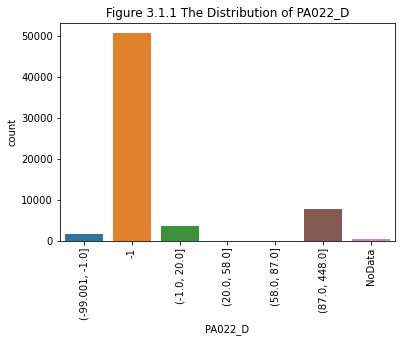

In [9]:
# Plot the distribution of PA022_D
plt.figure(figsize=(6,4))
g = sns.countplot(x='PA022_D', data=df, \
                  order=['(-99.001, -1.0]','-1','(-1.0, 20.0]','(20.0, 58.0]','(58.0, 87.0]','(87.0, 448.0]','NoData'])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Figure 3.1.1 The Distribution of PA022_D')

#### 2.1.2 PA023(DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_CALL)
The values for PA023 lies on "-1" much more than others.

In [10]:
# Split the data with 10 percentile and add an additional 'NoData' category for "NA".
df['PA023_D'] = pd.qcut(df['PA023'],10,duplicates='drop').values.add_categories('NoData')
df['PA023_D'] = df['PA023_D'].fillna('NoData').astype('str')

# Find the values of '-1' and assign them to the '-1' category
df.loc[df['PA023']==-1, 'PA023_D'] = '-1'

df.PA023_D.value_counts()

-1                 56004
(41.0, 81.0]        8023
(81.0, 448.0]       7793
(-1.0, 41.0]        6265
(-99.001, -1.0]     1534
NoData               381
Name: PA023_D, dtype: int64

Text(0.5, 1.0, 'Figure 3.1.2 The Distribution of PA023_D')

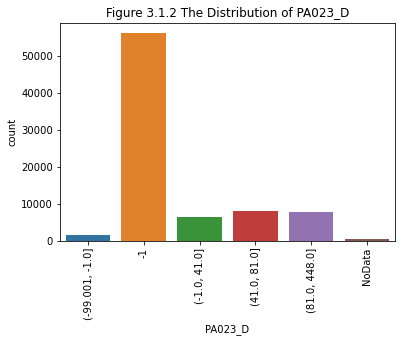

In [11]:
# Plot the distribution of PA023_D
plt.figure(figsize=(6,4))
g = sns.countplot(x='PA023_D', data=df, \
                  order=['(-99.001, -1.0]','-1','(-1.0, 41.0]','(41.0, 81.0]','(81.0, 448.0]','NoData'])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Figure 3.1.2 The Distribution of PA023_D')

#### 2.1.3 PA029(AVG_LEN_COLLECTION_OR_HIGH_RISK_INBOUND_CALLS)
Tthe values for PA029 lies on "-98" much more than others.

In [12]:
# Split the data with 10 percentile and add an additional 'NoData' category for "NA".
df['PA029_D'] = pd.qcut(df['PA029'],10,duplicates='drop').values.add_categories('NoData')
df['PA029_D'] = df['PA029_D'].fillna('NoData').astype('str')

# Find the values of '-98' and assign them to the '-98' category
df.loc[df['PA029']==-98, 'PA029_D'] = '-98'

df.PA029_D.value_counts()

-98                 53086
(40.0, 80.0]         7968
(80.0, 2872.0]       7896
(11.0, 40.0]         7896
(-99.001, -98.0]     1534
(-98.0, 11.0]        1239
NoData                381
Name: PA029_D, dtype: int64

Text(0.5, 1.0, 'Figure 3.1.3 The Distribution of PA029_D')

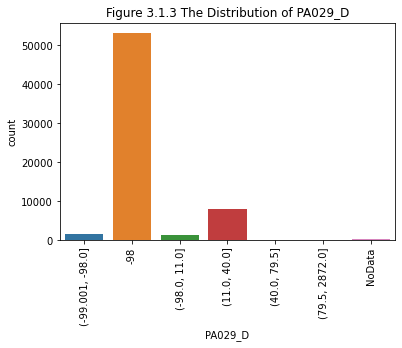

In [13]:
# Plot the distribution of PA029_D
plt.figure(figsize=(6,4))
g = sns.countplot(x='PA029_D', data=df, \
                  order=['(-99.001, -98.0]','-98','(-98.0, 11.0]','(11.0, 40.0]','(40.0, 79.5]','(79.5, 2872.0]', 'NoData'])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Figure 3.1.3 The Distribution of PA029_D')

#### [Back to the top](#0)

### 2.2 WOE Transformation for Categorical Variables <a class="anchor" id="22"></a>
The goal of WOE(Weight of Evidence) transformation is to get the maximum difference among the binned categories relating to the target variable. It counts the number of responders and non-responders in each binned categories, then assigns a numeric value to each of the binned categories.

In [14]:
# Define a Function for WOE
def WOE(var):
    df[var] = df[var].fillna('NoData')
    k = df[[var,'loan_default']].groupby(var)['loan_default'].agg(['count','sum']).reset_index()
    k.columns = [var,'Count','Good']
    k['Bad'] = k['Count'] - k['Good']
    k['Good %'] = (k['Good'] / k['Good'].sum()*100).round(2)
    k['Bad %'] = (k['Bad'] / k['Bad'].sum()*100).round(2)
    k[var+'_WOE'] = np.log(k['Good %'] / k['Bad %']).round(2)
    k = k.sort_values(by=var+'_WOE')
    return(k)

#### 2.2.1 Applicate Variables
In the applicate variables, AP003(CODE_EDUCATION) and AP008(FLAG_IP_CITY_NOT_APPL_CITY) are categorical variables. We can do WOE transformation on them.
#### AP003

In [15]:
# WOE for AP003
k_AP003 = WOE('AP003')
k_AP003

,AP003,Count,Good,Bad,Good %,Bad %,AP003_WOE
4,6,14,0,14,0.00,0.02,-inf
3,5,232,14,218,0.09,0.34,-1.33
2,4,10846,1365,9481,8.81,14.70,-0.51
1,3,23829,4145,19684,26.76,30.51,-0.13
0,1,45079,9964,35115,64.33,54.43,0.17


Noted that AP003 after WOE contains "-inf" value which needs futher transformation. 

In [16]:
# Replace inf with 9999
from numpy import inf
k_AP003.loc[k_AP003['AP003_WOE']==-inf, 'AP003_WOE'] = '-999'
k_AP003

,AP003,Count,Good,Bad,Good %,Bad %,AP003_WOE
4,6,14,0,14,0.00,0.02,-999
3,5,232,14,218,0.09,0.34,-1.33
2,4,10846,1365,9481,8.81,14.70,-0.51
1,3,23829,4145,19684,26.76,30.51,-0.13
0,1,45079,9964,35115,64.33,54.43,0.17


In [50]:
# convert the object into numeric
k_AP003['AP003_WOE'] = pd.to_numeric(k_AP003['AP003_WOE'])

In [51]:
# Append the WOE value of each category back to the original data
df = pd.merge(df, k_AP003[['AP003','AP003_WOE']],
                 left_on='AP003',right_on='AP003', how='left')

#### AP008

In [18]:
# WOE for AP008
k_AP008 = WOE('AP008')
k_AP008

,AP008,Count,Good,Bad,Good %,Bad %,AP008_WOE
0,1,8438,1420,7018,9.17,10.88,-0.17
1,2,21882,3921,17961,25.32,27.84,-0.09
2,3,18471,3613,14858,23.33,23.03,0.01
3,4,14284,2990,11294,19.31,17.51,0.10
4,5,16925,3544,13381,22.88,20.74,0.10


In [19]:
# Append the WOE value of each category back to the original data
df = pd.merge(df, k_AP008[['AP008','AP008_WOE']],
                 left_on='AP008',right_on='AP008', how='left')

In [20]:
# the first 5 records of df dataset after WOE for applicate variables
df.head()

,Unnamed: 0.1,Unnamed: 0,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,...,CD170,CD172,CD173,MB005,MB007,PA022_D,PA023_D,PA029_D,AP003_WOE,AP008_WOE
0,0,1,1,1,31,2,1,12,2017/7/6 10:21,ios,...,1449.0,2249.0,2249.0,7.0,IPHONE7,-1,-1,-98,0.17,0.01
1,1,2,2,0,27,1,1,12,2017/4/6 12:51,h5,...,-99.0,-99.0,-99.0,NaN,WEB,-1,-1,-98,0.17,0.10
2,2,3,3,0,33,1,4,12,2017/7/1 14:11,h5,...,0.0,143.0,110.0,8.0,WEB,-1,-1,-98,-0.51,-0.09
3,3,4,4,0,34,2,4,12,2017/7/7 10:10,android,...,0.0,0.0,0.0,10.0,OPPO,-1,-1,-98,-0.51,0.10
4,4,5,5,0,47,2,1,12,2017/7/6 14:37,h5,...,-99.0,-99.0,-99.0,NaN,WEB,"(-99.001, -1.0]","(-99.001, -1.0]","(-99.001, -98.0]",0.17,0.10


#### 2.2.2 Credit Bureau Variables
In credit bureau variables, CR015(MONTH_CREDIT_CARD_MOB_MAX) and CR019(SCORE_SINGLE_DEBIT_CARD_LIMIT) are categorical variables. We can do WOE transformation on them.
#### CR015

In [21]:
# Apply the WOE to CR015
k_CR015 = WOE('CR015')
k_CR015

,CR015,Count,Good,Bad,Good %,Bad %,CR015_WOE
4,6,27127,4201,22926,27.12,35.54,-0.27
0,2,3376,636,2740,4.11,4.25,-0.03
3,5,34339,7109,27230,45.90,42.21,0.08
2,4,7297,1595,5702,10.30,8.84,0.15
1,3,7861,1947,5914,12.57,9.17,0.32


In [22]:
# Append the WOE value of each category back to the original data
df = pd.merge(df, k_CR015[['CR015','CR015_WOE']],
                 left_on='CR015',right_on='CR015', how='left')

#### CR019

In [23]:
# WOE for CR019
k_CR019 = WOE('CR019')
k_CR019

,CR019,Count,Good,Bad,Good %,Bad %,CR019_WOE
8,9,2893,472,2421,3.05,3.75,-0.21
11,12,4378,714,3664,4.61,5.68,-0.21
10,11,13415,2214,11201,14.29,17.36,-0.19
9,10,2304,408,1896,2.63,2.94,-0.11
5,6,5178,928,4250,5.99,6.59,-0.10
7,8,3240,592,2648,3.82,4.10,-0.07
6,7,6423,1254,5169,8.10,8.01,0.01
4,5,9594,1887,7707,12.18,11.95,0.02
3,4,9727,2065,7662,13.33,11.88,0.12
2,3,13320,2850,10470,18.40,16.23,0.13


In [24]:
# Append the WOE value of each category back to the original data
df = pd.merge(df, k_CR019[['CR019','CR019_WOE']],
                 left_on='CR019',right_on='CR019', how='left')

In [25]:
# the first 5 records of df dataset after WOE for applicate variables
df.head()

,Unnamed: 0.1,Unnamed: 0,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,...,CD173,MB005,MB007,PA022_D,PA023_D,PA029_D,AP003_WOE,AP008_WOE,CR015_WOE,CR019_WOE
0,0,1,1,1,31,2,1,12,2017/7/6 10:21,ios,...,2249.0,7.0,IPHONE7,-1,-1,-98,0.17,0.01,0.15,0.17
1,1,2,2,0,27,1,1,12,2017/4/6 12:51,h5,...,-99.0,NaN,WEB,-1,-1,-98,0.17,0.10,-0.27,-0.19
2,2,3,3,0,33,1,4,12,2017/7/1 14:11,h5,...,110.0,8.0,WEB,-1,-1,-98,-0.51,-0.09,-0.03,0.13
3,3,4,4,0,34,2,4,12,2017/7/7 10:10,android,...,0.0,10.0,OPPO,-1,-1,-98,-0.51,0.10,0.08,-0.07
4,4,5,5,0,47,2,1,12,2017/7/6 14:37,h5,...,-99.0,NaN,WEB,"(-99.001, -1.0]","(-99.001, -1.0]","(-99.001, -98.0]",0.17,0.10,-0.27,-0.19


#### 2.2.3 Binned Call Detail Variables: PA022_D, PA023_D, and PA029_D
The Credit Bureau variables were binned into categorical variables before. Now, we can do WOE transformation to PA022_D, PA023_D, and PA029_D.
#### PA022_D

In [26]:
# Apply the WOE to PA022_D
k_PA022_D = WOE('PA022_D')
k_PA022_D

,PA022_D,Count,Good,Bad,Good %,Bad %,PA022_D_WOE
1,"(-99.001, -1.0]",1534,230,1304,1.49,2.02,-0.30
5,-1,50639,8662,41977,55.93,65.07,-0.15
0,"(-1.0, 20.0]",3672,827,2845,5.34,4.41,0.19
2,"(20.0, 59.0]",8065,1867,6198,12.05,9.61,0.23
3,"(59.0, 87.0]",7909,1891,6018,12.21,9.33,0.27
4,"(87.0, 448.0]",7800,1916,5884,12.37,9.12,0.30
6,NoData,381,95,286,0.61,0.44,0.33


In [27]:
# Append the WOE value of each category back to the original data
df = pd.merge(df, k_PA022_D[['PA022_D','PA022_D_WOE']],
                 left_on='PA022_D',right_on='PA022_D', how='left')

#### PA023_D

In [28]:
# WOE for PA023_D
k_PA023_D = WOE('PA023_D')
k_PA023_D

,PA023_D,Count,Good,Bad,Good %,Bad %,PA023_D_WOE
1,"(-99.001, -1.0]",1534,230,1304,1.49,2.02,-0.30
4,-1,56004,9806,46198,63.31,71.61,-0.12
0,"(-1.0, 41.0]",6265,1462,4803,9.44,7.45,0.24
2,"(41.0, 81.0]",8023,1946,6077,12.56,9.42,0.29
3,"(81.0, 448.0]",7793,1949,5844,12.58,9.06,0.33
5,NoData,381,95,286,0.61,0.44,0.33


In [29]:
# Append the WOE value of each category back to the original data
df = pd.merge(df, k_PA023_D[['PA023_D','PA023_D_WOE']],
                 left_on='PA023_D',right_on='PA023_D', how='left')

#### PA029_D

In [30]:
# WOE for PA029_D
k_PA029_D = WOE('PA029_D')
k_PA029_D

,PA029_D,Count,Good,Bad,Good %,Bad %,PA029_D_WOE
1,"(-99.001, -98.0]",1534,230,1304,1.49,2.02,-0.30
5,-98,53086,9225,43861,59.56,67.99,-0.13
0,"(-98.0, 11.0]",1239,243,996,1.57,1.54,0.02
2,"(11.0, 40.0]",7896,1655,6241,10.69,9.67,0.10
3,"(40.0, 80.0]",7968,1999,5969,12.91,9.25,0.33
6,NoData,381,95,286,0.61,0.44,0.33
4,"(80.0, 2872.0]",7896,2041,5855,13.18,9.08,0.37


In [31]:
# Append the WOE value of each category back to the original data
df = pd.merge(df, k_PA029_D[['PA029_D','PA029_D_WOE']],
                 left_on='PA029_D',right_on='PA029_D', how='left')

In [32]:
# the first 5 records of df dataset after WOE for applicate variables
df.head()

,Unnamed: 0.1,Unnamed: 0,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,...,PA022_D,PA023_D,PA029_D,AP003_WOE,AP008_WOE,CR015_WOE,CR019_WOE,PA022_D_WOE,PA023_D_WOE,PA029_D_WOE
0,0,1,1,1,31,2,1,12,2017/7/6 10:21,ios,...,-1,-1,-98,0.17,0.01,0.15,0.17,-0.15,-0.12,-0.13
1,1,2,2,0,27,1,1,12,2017/4/6 12:51,h5,...,-1,-1,-98,0.17,0.10,-0.27,-0.19,-0.15,-0.12,-0.13
2,2,3,3,0,33,1,4,12,2017/7/1 14:11,h5,...,-1,-1,-98,-0.51,-0.09,-0.03,0.13,-0.15,-0.12,-0.13
3,3,4,4,0,34,2,4,12,2017/7/7 10:10,android,...,-1,-1,-98,-0.51,0.10,0.08,-0.07,-0.15,-0.12,-0.13
4,4,5,5,0,47,2,1,12,2017/7/6 14:37,h5,...,"(-99.001, -1.0]","(-99.001, -1.0]","(-99.001, -98.0]",0.17,0.10,-0.27,-0.19,-0.30,-0.30,-0.30


In [52]:
features_afterWOE = ['AP001','AP003_WOE','AP008_WOE',
                     'CR009','CR015_WOE','CR019',
                     'PA022_D_WOE','PA023_D_WOE','PA029_D_WOE',
                     'TD001','TD005','TD006','TD009','TD010','TD014']

In [53]:
df[features_afterWOE].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 0 to 79999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AP001        80000 non-null  int64  
 1   AP003_WOE    80000 non-null  float64
 2   AP008_WOE    80000 non-null  float64
 3   CR009        80000 non-null  int64  
 4   CR015_WOE    80000 non-null  float64
 5   CR019        80000 non-null  int64  
 6   PA022_D_WOE  80000 non-null  float64
 7   PA023_D_WOE  80000 non-null  float64
 8   PA029_D_WOE  80000 non-null  float64
 9   TD001        80000 non-null  int64  
 10  TD005        80000 non-null  int64  
 11  TD006        80000 non-null  int64  
 12  TD009        80000 non-null  int64  
 13  TD010        80000 non-null  int64  
 14  TD014        80000 non-null  int64  
dtypes: float64(6), int64(9)
memory usage: 9.8 MB


#### [Back to the top](#0)

## 3. Building a Random Forest Model <a class="anchor" id="3"></a>
### 3.1 Dataset Preparation<a class="anchor" id="31"></a>

Then, split the dataset into "train" and "test" dataset for future training.

In [54]:

# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[features_afterWOE],
                                                    df['loan_default'], 
                                                    random_state=0)

### 3.2 Build a RF model

In [55]:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, Y_train)  
print(model.feature_importances_)

[0.0210396  0.20122575 0.01867779 0.04041376 0.08834891 0.01679118
 0.02798055 0.02733836 0.03417229 0.02598741 0.05591912 0.01750306
 0.35863309 0.01498283 0.05098629]


#### The Importance of the Features

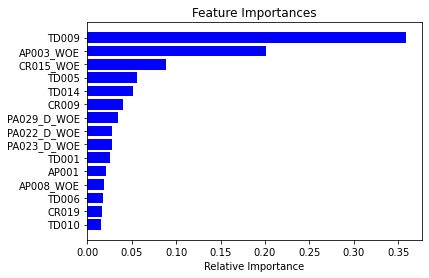

In [56]:
importances = model.feature_importances_
indices = np.argsort(importances)

features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## 4. SHAP Value
SHAP values (SHapley Additive exPlanations) is a method based on cooperative game theory and used to increase transparency and interpretability of machine learning models.

In [36]:
# !pip install shap

In [37]:
# !pip install numba==0.56.2
# !pip install llvmlite==0.39.1

In [38]:
import shap

In [57]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)

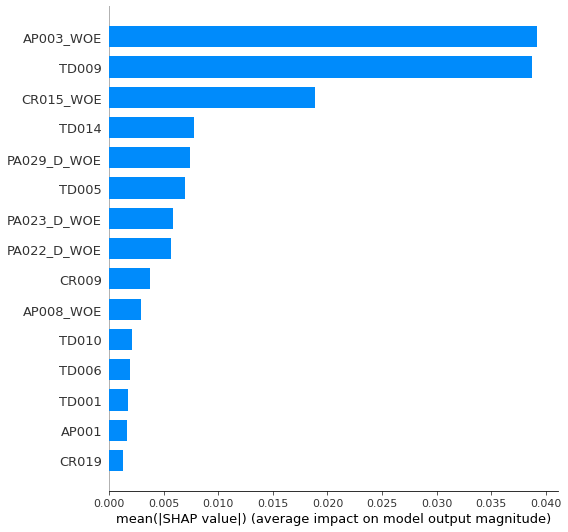

In [62]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

The above variable importance plot show the directions between the features and the target variable, which is the power of the Shap value plot as shown below.   
This plot is made of many dots. Each dot has three characteristics. The graph below plots the SHAP values of every feature for every sample. It shorts features by the total of absolute SHAP values over all samples. The color represents the feature value (red high, blue low).

The vertical location shows the feature importance.  
The horizontal location shows whether the effect of that value caused a higher or lower prediction.  
Color shows whether that feature was high or low for that observation.  

### 4.1 SHAP Plot <a class="anchor" id="4"></a>


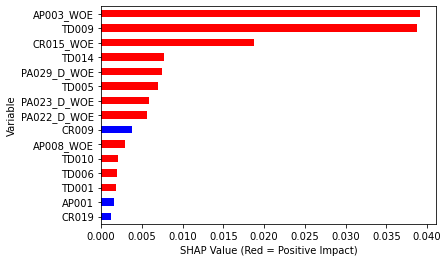

In [63]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(6,4),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
ABS_SHAP(shap_values,X_train)  

The graph above shows that 'AP003_WOE' and 'TD009' have the highest impact on the loan default and the impact are positive. The variables with blue bars ('CR009', 'AP001', and 'CR019') have negtive impact on the target.

### Summery Plot

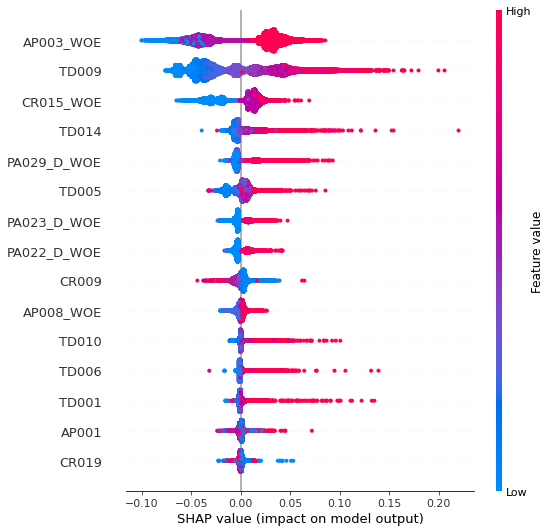

In [68]:
shap.summary_plot(shap_values, X_train)

We can describe the model. The idetification of loan default is associated with the following characteristics:
* 'AP003_WOE', 'TD009', 'CR015_WOE', 'TD014', 'PA029_D_WOE', 'TD005', 'PA023_D_WOE', 'PA022_D_WOE', 'AP008_WOE', 'TD010', 'TD006', 'TD001', and 'AP001' have positive impact on the loan default. 
* High values for 'AP003_WOE', 'TD009', 'CR015_WOE', 'TD014', 'PA029_D_WOE', 'TD005', 'TD010', 'TD006', 'TD001', and 'AP001' are all associated with higher SHAP values;
* 'CR009' and 'CR019' have negative impact on the loan default.


### Dependence_Plot

To understand how a single feature effects the output of the model we can plot the SHAP value of that feature vs. the value of the feature for all the examples in a dataset. 
Vertical dispersion at a single value of selected feature represents interaction effects with other features. To help reveal these interactions, dependence_plot automatically selects another feature for coloring.

#### AP003 - education level/code
Since SHAP values represent a feature's responsibility for a change in the model output, the plot below represents the change in predicted loan default as 'AP003'(education level/code) changes. 

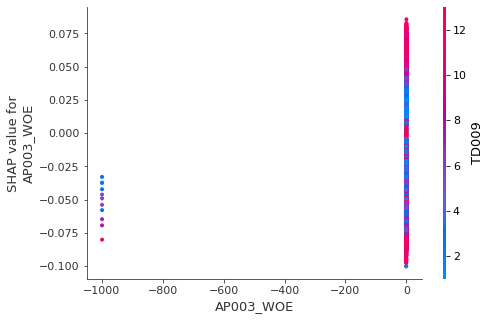

In [84]:
shap.dependence_plot("AP003_WOE", shap_values, X_train)

The education level impact on the loan fault despite the level of the amount of track-data query for P2P in last 3 months.

#### TD009 - the amount of track-data query for P2P in last 3 months

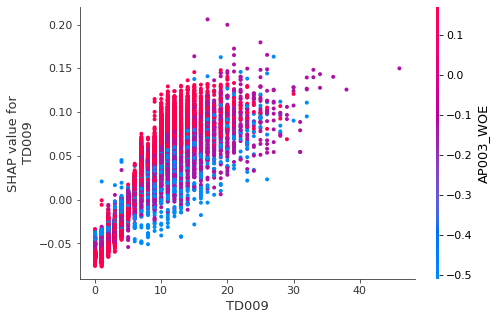

In [71]:
shap.dependence_plot("TD009", shap_values, X_train)

From the graph above, we can see that the amount of track-data query for P2P in last 3 months has less impact on loan default with a low 'AP003_WOE', which indicates high education level.

#### CR015_WOE - MONTH_CREDIT_CARD_MOB_MAX

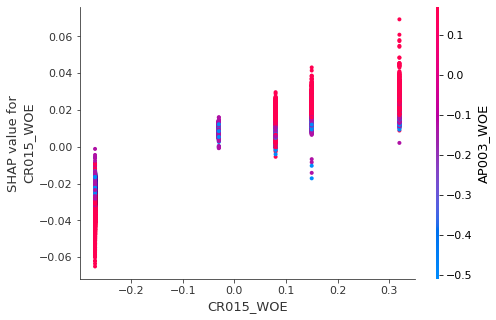

In [72]:
shap.dependence_plot("CR015_WOE", shap_values, X_train, show=False)
plt.show()

From the graph above, we can see that the max MOB in a month has less impact on loan default with a low 'AP003_WOE', which indicates high education level.

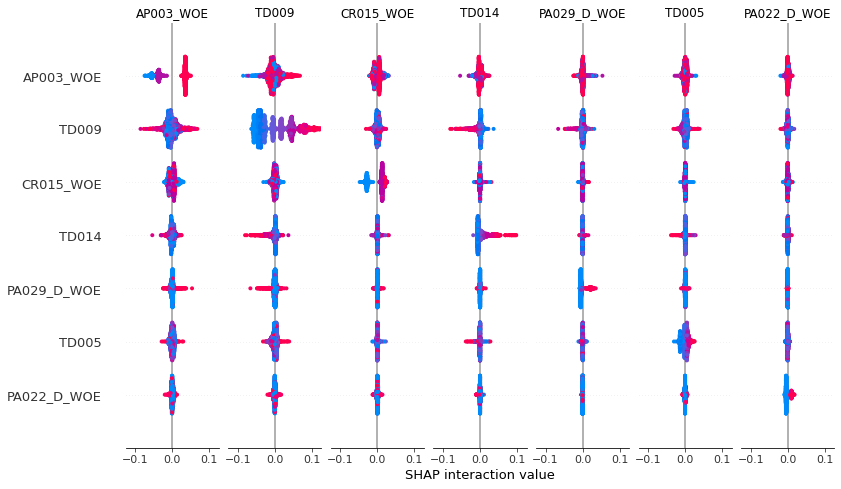

In [85]:
# We explain the first 2,000 people in order to run quicker as an example.
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(X_train.iloc[:2000,:])

shap.summary_plot(shap_interaction_values, X_train.iloc[:2000,:])

By pointing out important main and interaction effects, this plot can give a similar insight to the absolute mean plot. Specifically, we can see the cells that have high SHAP values correspond to the same cells with high absolute mean values in feature importance plot. The summary plot gives additional insight by visualising the nature of the relationships. For example, we can see that the main effects of the AP003, TD009, TD014 are all positive.

### Force Plot
We can see how the features impact on single observation by defining a shap_plot.  
* Output value: is the prediction for that observation
* Base value: The base value E(y_hat) is "the value that would be predicted if we did not know any features for the current output." In other words, it is the mean prediction, or mean(yhat).
* Features: The above explanation shows features that contributes to push the final prediction away from the base value.
* Red/blue: Those features that push the prediction higher (to the right) are shown in red, and those pushing the prediction lower are in blue. 

In [ ]:
shap.initjs()

In [76]:
def shap_plot(j):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

In [77]:
X_train.mean()

AP001             31.692400
AP003_WOE         -0.198939
AP008_WOE         -0.001466
CR009          35170.332250
CR015_WOE         -0.013169
CR019              6.191950
PA022_D_WOE       -0.011040
PA023_D_WOE       -0.007451
PA029_D_WOE       -0.010815
TD001              1.992450
TD005              3.599217
TD006              1.347567
TD009              5.414867
TD010              2.023183
TD014              2.607933
dtype: float64

In [78]:
Y_test.mean()

0.18875

#### The SHAP plot of the first observation

In [79]:
shap_plot(0)

* Base value: 0.21
* Features:
 - POSITIVE impact on the loan default
   * TD009(TD_CNT_QUERY_LAST_3MON_P2P): The the amount of track-data query for P2P in last 3 months is 7 which is higher than the average value 5.41. So it pushes the prediction to the right.
   * CR015_WOE(MONTH_CREDIT_CARD_MOB_MAX): A higher than the average MONTH_CREDIT_CARD_MOB_MAX (= 0.15 > -0.013) drives the prediction to the right.
   * AP008_WOE(FLAG_IP_CITY_NOT_APPL_CITY): A higher than the average (= 0.1 > -0.001) pushes the prediction to the right.
 - NEGATIVE impact on the loan default
   * AP003_WOE(CODE_EDUCATION): The education level is -0.13 which is higher than the average value -0.20. So it pushes the prediction to the right.
   * PA022_D_WOE(DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_OR_HIGH_RISK_CALL): A lower than the average the days between application and first collection or high risk call(= -0.15 < -0.01) drives the prediction to the left.
   * PA023_D_WOE(DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_CALL): A higher than the average (= 0.1 > -0.001) pushes the prediction to the left.

In [81]:
shap_plot(2)

* Base value: 0.17
* Features:
 - POSITIVE impact on the loan default
   * PA022_D_WOE(DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_OR_HIGH_RISK_CALL): A higher than the average the days between application and first collection or high risk call(= 0.3 > -0.01) drives the prediction to the right. 
   * AP003_WOE(CODE_EDUCATION): The education level is 0.17 which is higher than the average value -0.20. So it pushes the prediction to the right.
   * PA029_D_WOE(AVG_LEN_COLLECTION_OR_HIGH_RISK_INBOUND_CALLS): The average length
   
   of collection or high risk inbound calls is 0.37, which is higher than the average value -0.01. So it pushes the prediction to the right.

 - NEGATIVE impact on the loan default
   * CR015_WOE(MONTH_CREDIT_CARD_MOB_MAX): A lower than the average MONTH_CREDIT_CARD_MOB_MAX (= -0.27 > -0.013) drives the prediction to the left.
   * TD009(TD_CNT_QUERY_LAST_3MON_P2P): The the amount of track-data query for P2P in last 3 months is 5 which is lower than the average value 5.41. So it pushes the prediction to the left.
   * TD014(TD_CNT_QUERY_LAST_6MON_SMALL_LOAN): The the amount of track-data query for small loan in last 6 months is 1 which is higher than the average value 2.61. So it pushes the prediction to the right.
   * PA023_D_WOE(DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_CALL): A lower than the average (= -0.12 < -0.001) pushes the prediction to the right.

In [83]:
shap_plot(4)

* Base value: 0.14
* Features:
 - POSITIVE impact on the loan default
   * CR009(AMT_LOAN_TOTAL): the total amount of loan is 0, which is lower than the avrage value 35170.33. So it pushes the prediction to the left.
   * CR015_WOE(MONTH_CREDIT_CARD_MOB_MAX): A higher than the average MONTH_CREDIT_CARD_MOB_MAX (= 0.08 > -0.013) drives the prediction to the right.
   * AP003_WOE(CODE_EDUCATION): The education level is 0.17 which is higher than the average value -0.20. So it pushes the prediction to the right.

 - NEGATIVE impact on the loan default
   * TD009(TD_CNT_QUERY_LAST_3MON_P2P): The the amount of track-data query for P2P in last 3 months is 0 which is lower than the average value 5.41. So it pushes the prediction to the left.
   * TD005(TD_CNT_QUERY_LAST_1MON_P2P): The the amount of track-data query for P2P in last 1 month is 0 which is lower than the average value 3.60. So it pushes the prediction to the left.
   * TD014(TD_CNT_QUERY_LAST_6MON_SMALL_LOAN): The the amount of track-data query for small loan in last 6 months is 0 which is lower than the average value 2.61. So it pushes the prediction to the left.
   * PA029_D_WOE(AVG_LEN_COLLECTION_OR_HIGH_RISK_INBOUND_CALLS): The average length of collection or high risk inbound calls is -0.13, which is lower than the average value -0.01. So it pushes the prediction to the left.
   * PA022_D_WOE(DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_OR_HIGH_RISK_CALL): A higher than the average the days between application and first collection or high risk call(= -0.15 < -0.01) drives the prediction to the left. 

In [89]:
shap_plot(5)

* Base value: 0.22
* Features:
 - POSITIVE impact on the loan default
   * TD009(TD_CNT_QUERY_LAST_3MON_P2P): The the amount of track-data query for P2P in last 3 months is 12 which is higher than the average value 5.41. So it pushes the prediction to the right.
   * PA022_D_WOE(DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_OR_HIGH_RISK_CALL): A higher than the average the days between application and first collection or high risk call(= 0.27 > -0.01) drives the prediction to the right. 
   * TD005(TD_CNT_QUERY_LAST_1MON_P2P): The the amount of track-data query for P2P in last 1 month is 8 which is higher than the average value 3.60. So it pushes the prediction to the right.
   * TD001(TD_CNT_QUERY_LAST_7Day_P2P): The the amount of track-data query for P2P in last 7 days is 6 which is higher than the average value 1.99. So it pushes the prediction to the right.

 - NEGATIVE impact on the loan default
   * AP003_WOE(CODE_EDUCATION): The education level is -0.13 which is higher than the average value -0.20. So it pushes the prediction to the right.
   * CR015_WOE(MONTH_CREDIT_CARD_MOB_MAX): A lower than the average MONTH_CREDIT_CARD_MOB_MAX (= -0.27 < -0.013) drives the prediction to the left.
   * PA029_D_WOE(AVG_LEN_COLLECTION_OR_HIGH_RISK_INBOUND_CALLS): The average length of collection or high risk inbound calls is 0.1, which is higher than the average value -0.01. So it pushes the prediction to the right.


## 5. Conclusion <a class="anchor" id="5"></a>
In this report, we select 15 features and conduct variable transformation including missing imputation, categorical binning and WOE for the Scikit-learn method. The WOE Transformation can enhance the model's performance as well. We then train a random forest model on the transformed data and use SHAP value to see how much each factor in a model has contributed to the prediction. Specifically, we use summary plot, dependence plot and force plot to identify and visualise important relationships in this model.


Some important findings include:
* 'AP003_WOE'(education level) and 'TD009'(the amount of track-data query for P2P in last 3 months) have the highest impact on the loan default and the impact are positive. Noted that 'AP003_WOE' has been WOE transformed, the higher education level in the practice should associate with lower loan default, which aligns with the instinct. 
* High values for 'AP003_WOE', 'TD009', 'CR015_WOE', 'TD014', 'PA029_D_WOE', 'TD005', 'TD010', 'TD006', 'TD001', and 'AP001' are all associated with higher SHAP values.
* For the dependence between two variables, we found that the amount of track-data query for P2P in last 3 months has less impact on loan default with a low 'AP003_WOE', which indicates high education level.
* We also see some observations's influence. For example, for one of the observations, 'TD009'(the the amount of track-data query for P2P in last 3 months), 'CR015_WOE'(MONTH_CREDIT_CARD_MOB_MAX)and 'AP008_WOE'(FLAG_IP_CITY_NOT_APPL_CITY) have POSITIVE impact on the loan default, while 'AP003_WOE'(education level), 'PA022_D_WOE'(the days between application and first collection or high risk call) and 'PA023'(the days between application and first collection) have negtive impact on the loan default.

#### [Back to the top](#0)